In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings

In [4]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2 ,f_classif, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve, auc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import confusion_matrix
import xgboost as xgb

In [7]:
## First reading the Data
modell_data    = pd.read_excel('C:/Users/Hp/Downloads/Q2_modeling_data.xlsx')
modell_data.columns

Index(['ref_var', 'bad_var', 'Net_debits_last_1_month',
       'Net_credits_last_1_month', 'Balance_of_outstanding_loans_last_1_month',
       'loan_enquiries_last_1_month',
       'overdue_on_outstanding_loans_last_1_month', 'age', 'monthly_salary',
       'number_of_bank_accounts', 'married_indicator', 'day_of_application',
       'levelofeducation_v1', 'state'],
      dtype='object')

In [46]:
## Exploring the Data at the first sight
print("The shape of dataframe is :",modell_data.shape)
modell_data.head()

The shape of dataframe is : (579, 14)


,ref_var,bad_var,Net_debits_last_1_month,Net_credits_last_1_month,Balance_of_outstanding_loans_last_1_month,loan_enquiries_last_1_month,overdue_on_outstanding_loans_last_1_month,age,monthly_salary,number_of_bank_accounts,married_indicator,day_of_application,levelofeducation_v1,state
0,1234,1,589.26,2998.00,0.0,0,0.000000,24,25452.86,1.0,0,Friday,Post Graduate,Delhi
1,1235,0,9700.00,NaN,89201.0,4,0.000000,43,11000.00,1.0,0,Friday,12th Pass,Madhya Pradesh
2,1236,0,11951.00,8791.75,NaN,18,NaN,20,4351.00,2.0,0,Monday,12th Pass,Telangana
3,1237,0,28228.00,17154.15,19346.0,15,8721.644826,28,25000.00,1.0,0,Wednesday,Graduate,Telangana
4,1238,0,8770.00,775.00,0.0,0,0.000000,22,12647.00,1.0,0,Monday,Graduate,Telangana


## Question 2 
### Data Analysis
#### Checking the descriptive statistics for all the variables


In [47]:
modell_data.describe()

,ref_var,bad_var,Net_debits_last_1_month,Net_credits_last_1_month,Balance_of_outstanding_loans_last_1_month,loan_enquiries_last_1_month,overdue_on_outstanding_loans_last_1_month,age,monthly_salary,number_of_bank_accounts,married_indicator
count,579.000000,579.000000,579.000000,511.000000,517.000000,579.000000,559.000000,579.000000,578.000000,560.000000,579.000000
mean,1523.000000,0.386874,10760.770052,9678.138141,14048.350271,4.689119,3764.460688,28.953368,19633.545363,1.716071,0.074266
std,167.287178,0.487456,13427.745910,12729.944234,22240.192047,8.058828,7694.001182,5.930354,10319.652189,1.011433,0.262430
min,1234.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,78.130000,1.000000,0.000000
25%,1378.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,12766.500000,1.000000,0.000000
50%,1523.000000,0.000000,4695.600000,3361.000000,2547.000000,2.000000,89.019431,28.000000,18000.000000,1.000000,0.000000
75%,1667.500000,1.000000,17591.355000,14850.780000,19453.000000,6.000000,3247.758699,33.000000,25000.000000,2.000000,0.000000
max,1812.000000,1.000000,49775.000000,49517.540000,100000.000000,78.000000,45245.820154,49.000000,93132.860000,5.000000,1.000000


In [57]:
modell_data.median(axis = 0) 

ref_var                                       1523.000000
bad_var                                          0.000000
Net_debits_last_1_month                       4695.600000
Net_credits_last_1_month                      3361.000000
Balance_of_outstanding_loans_last_1_month     2547.000000
loan_enquiries_last_1_month                      2.000000
overdue_on_outstanding_loans_last_1_month       89.019431
age                                             28.000000
monthly_salary                               18000.000000
number_of_bank_accounts                          1.000000
married_indicator                                0.000000
dtype: float64

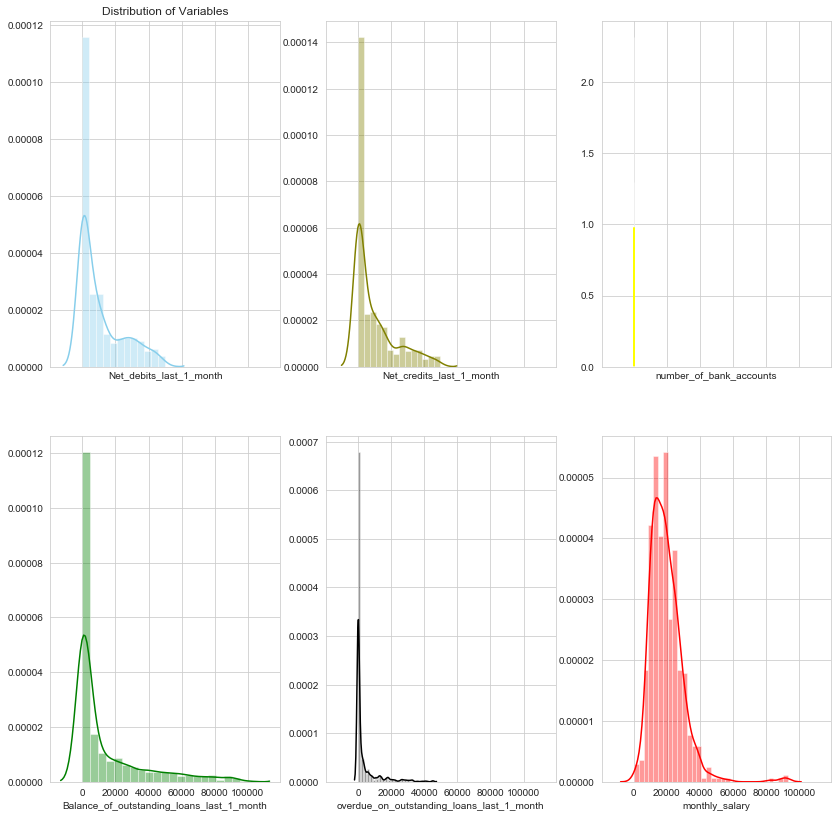

In [38]:
#Checking the Distribution of variables
f, axes = plt.subplots(2, 3, figsize=(14, 14), sharex=True)
sns.distplot( modell_data["Net_debits_last_1_month"].dropna(), color="skyblue", ax=axes[0, 0]).set(title = 'Distribution of Variables')
sns.distplot( modell_data["Net_credits_last_1_month"].dropna(), color="olive", ax=axes[0, 1])
sns.distplot( modell_data["Balance_of_outstanding_loans_last_1_month"].dropna() , color="green", ax=axes[1, 0])
sns.distplot( modell_data["overdue_on_outstanding_loans_last_1_month"].dropna() , color="black", ax=axes[1, 1])
sns.distplot( modell_data["number_of_bank_accounts"].dropna() , color="yellow", ax=axes[0, 2])
sns.distplot( modell_data["monthly_salary"].dropna() , color="red", ax=axes[1, 2])

In [51]:
print(modell_data['bad_var'].value_counts())
modell_data['bad_var'].value_counts(normalize=True)

0    355
1    224
Name: bad_var, dtype: int64


0    0.613126
1    0.386874
Name: bad_var, dtype: float64

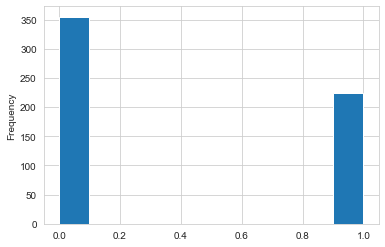

In [53]:
modell_data['bad_var'].plot.hist();

### Missing values Analysis & Treatement

In [10]:
#Function to find the missing values percentages for all the variables
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_columns = mis_val_columns[
            mis_val_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_columns 

#Calling the function
miss_values = missing_values(modell_data)
miss_values

,Missing Values,% of Total Values
Net_credits_last_1_month,68,11.7
Balance_of_outstanding_loans_last_1_month,62,10.7
overdue_on_outstanding_loans_last_1_month,20,3.5
number_of_bank_accounts,19,3.3
monthly_salary,1,0.2


#### Replacing the missing values with the median & mean when
#### Median: When the mean and median values are vary close to each other. Replace by Median
#### Mean: When the mean and median values are quite apart, Replace by Mean

In [8]:
df = modell_data.copy()
df['Net_credits_last_1_month'] =df['Net_credits_last_1_month'].transform(lambda x: x.fillna(x.mean()))
df['Balance_of_outstanding_loans_last_1_month'] =df['Balance_of_outstanding_loans_last_1_month'].transform(lambda x: x.fillna(x.mean()))
df['overdue_on_outstanding_loans_last_1_month'] =df['overdue_on_outstanding_loans_last_1_month'].transform(lambda x: x.fillna(x.mean()))
df['monthly_salary'] =df['monthly_salary'].transform(lambda x: x.fillna(x.median()))
df['number_of_bank_accounts'] =df['number_of_bank_accounts'].transform(lambda x: x.fillna(x.median()))

In [11]:
### Checking the NA values again
miss_values = missing_values(df)
miss_values

,Missing Values,% of Total Values


## Bivariate Analysis

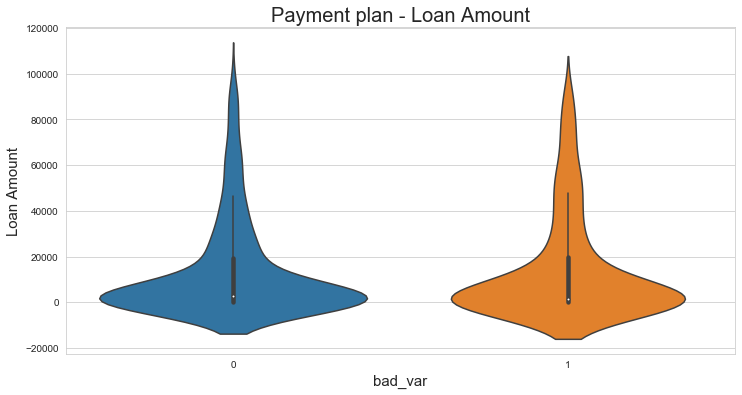

In [12]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="bad_var",y="Balance_of_outstanding_loans_last_1_month",data=modell_data,split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("bad_var", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

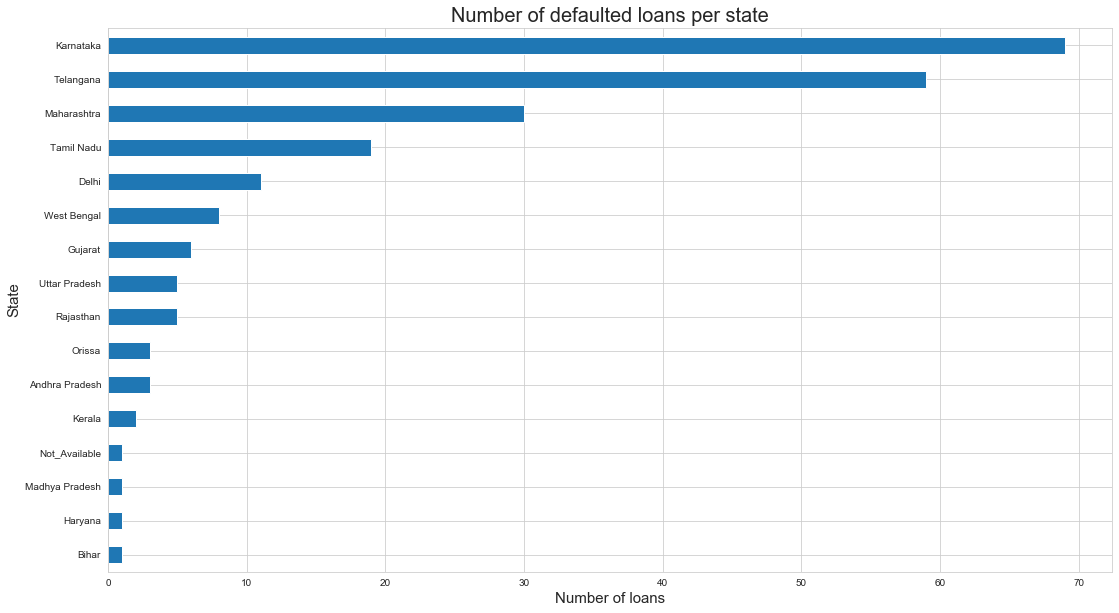

In [13]:
fig = plt.figure(figsize=(18,10))
modell_data[modell_data['bad_var']==1].groupby('state')['bad_var'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

##  Creating secondary variables to be used in the model
### Change the variables to one hot encoding for modelling perspective

In [14]:
df = pd.get_dummies(df)
df = df[[c for c in df if c not in ['bad_var']]+['bad_var']]

In [15]:
df.head()

,ref_var,Net_debits_last_1_month,Net_credits_last_1_month,Balance_of_outstanding_loans_last_1_month,loan_enquiries_last_1_month,overdue_on_outstanding_loans_last_1_month,age,monthly_salary,number_of_bank_accounts,married_indicator,...,state_Maharashtra,state_Not_Available,state_Orissa,state_Punjab,state_Rajasthan,state_Tamil Nadu,state_Telangana,state_Uttar Pradesh,state_West Bengal,bad_var
0,1234,589.26,2998.000000,0.000000,0,0.000000,24,25452.86,1.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1235,9700.00,9678.138141,89201.000000,4,0.000000,43,11000.00,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1236,11951.00,8791.750000,14048.350271,18,3764.460688,20,4351.00,2.0,0,...,0,0,0,0,0,0,1,0,0,0
3,1237,28228.00,17154.150000,19346.000000,15,8721.644826,28,25000.00,1.0,0,...,0,0,0,0,0,0,1,0,0,0
4,1238,8770.00,775.000000,0.000000,0,0.000000,22,12647.00,1.0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# Finding the correlation betwen each of the variables with Bad
correlations = df.corr()['bad_var'].sort_values()

day_of_application_Tuesday           -0.089020
day_of_application_Sunday            -0.071648
state_Rajasthan                      -0.065127
levelofeducation_v1_10th Pass        -0.059320
state_Punjab                         -0.057327
state_Haryana                        -0.055426
state_Maharashtra                    -0.054248
levelofeducation_v1_less than 10th   -0.047141
state_Assam                          -0.046767
state_Not_Available                  -0.035811
state_Gujarat                        -0.033740
state_Kerala                         -0.033265
Name: bad_var, dtype: float64


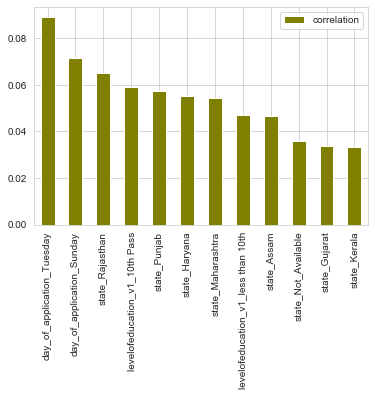

In [79]:
# Taking the Top 12 highly correlated values
top_12 = correlations.head(12)
print(top_12)
data_top_12 = pd.DataFrame(-top_12)
data_top_12.columns = ['correlation']
data_top_12.plot(kind = 'bar', color = "olive")

day_of_application_Thursday     0.023354
state_Orissa                    0.023768
day_of_application_Friday       0.043091
ref_var                         0.044512
levelofeducation_v1_Diploma     0.045502
number_of_bank_accounts         0.049066
levelofeducation_v1_Graduate    0.050279
day_of_application_Wednesday    0.051973
state_Bihar                     0.052363
state_Tamil Nadu                0.067938
state_Telangana                 0.084558
bad_var                         1.000000
Name: bad_var, dtype: float64


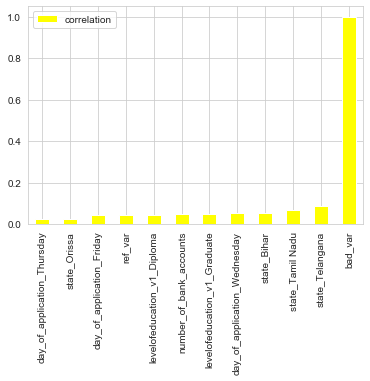

In [80]:
# Taking the bottom 10 highly correlated values
bot_10 = correlations.tail(12)
print(bot_10)
data_bot_10 = pd.DataFrame(bot_10)
data_bot_10.columns = ['correlation']
data_bot_10.plot(kind = 'bar', color= "yellow")

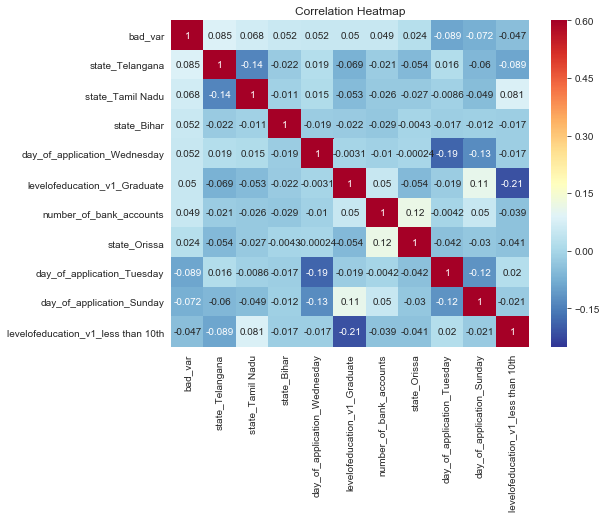

In [19]:
# calculate the correlation heatmap
dfcor = df[bot_10.index[:-8:-1].append(bot_10.index[1:2]).append(top_12.index[0:2]).append(top_12.index[7:8])].corr()
plt.figure(figsize = (8, 6))
sns.heatmap(dfcor, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### Now checking these variables with the Bad variable

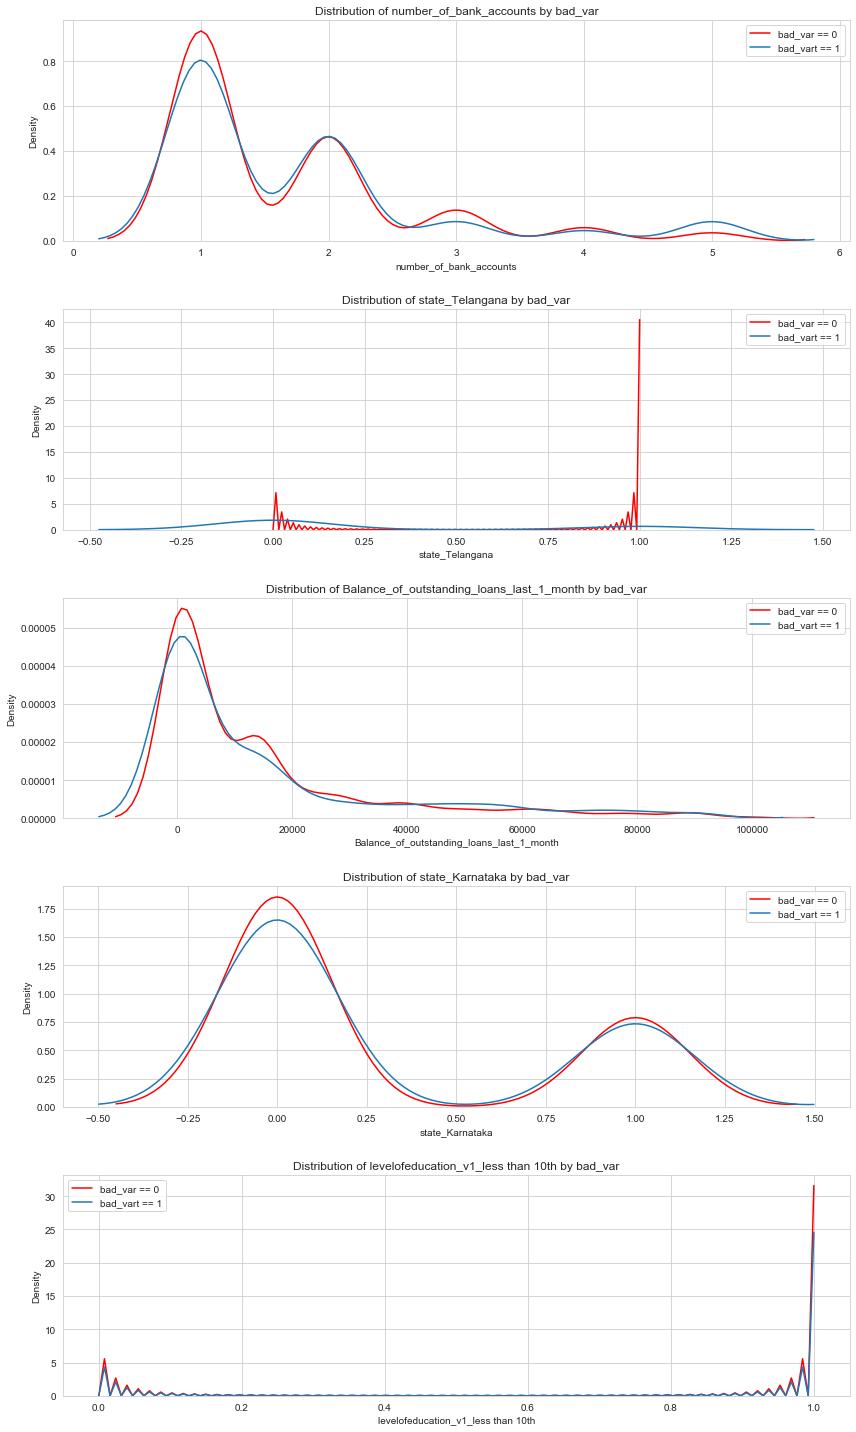

In [81]:
plt.figure(figsize = (12, 20))
for i, feature in enumerate(['number_of_bank_accounts','state_Telangana','Balance_of_outstanding_loans_last_1_month','state_Karnataka', 'levelofeducation_v1_less than 10th']):
    
    plt.subplot(5, 1, i + 1)
    sns.kdeplot(df.loc[df['bad_var'] == 0, feature], label = 'bad_var == 0', color = 'red')
    sns.kdeplot(df.loc[df['bad_var'] == 1, feature], label = 'bad_vart == 1')

    plt.title('Distribution of %s by bad_var' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### Now Selecting the features as per the above analysis
### Taking some of the Top10, bottom 10 & then some selected variables

In [21]:
df_model    = df[bot_10.index.append(top_12.index)]
df_model    = df_model.drop(['ref_var', 'state_Bihar', 'state_Punjab', 'state_Assam'], axis=1)

df_model    = df_model.join(df['state_Karnataka'])

In [22]:
df_model.columns
print("The shape of the data is ", df_model.shape)

The shape of the data is  (579, 21)


# Starting the modelling Process
## Creating Train and Test ( a split of 80:20 between Train & Test)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['bad_var'], axis=1), df_model['bad_var'], test_size=0.2, random_state=76)

### Now evaluating the models on various Algorithms

#### Logistic Regression

In [24]:
regressor = LogisticRegression(random_state =2, solver='lbfgs')
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred = regressor.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is ', 100*score)
print(metrics.classification_report(y_test, pred))

Accuracy is  63.793103448275865
              precision    recall  f1-score   support

           0       0.66      0.89      0.76        73
           1       0.53      0.21      0.30        43

    accuracy                           0.64       116
   macro avg       0.59      0.55      0.53       116
weighted avg       0.61      0.64      0.59       116



In [82]:
#GINI & AUC 
pred = regressor.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print("The AUC of the model is ", roc_auc)
Gini   = 2*roc_auc - 1
print("The Gini of the model is ", Gini)

0.5498566422427524
0.09971328448550487


#### Random Forest


In [27]:
rfc = RandomForestClassifier(random_state=8)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [28]:
pred = rfc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is ', 100*score)
print(metrics.classification_report(y_test, pred))

Accuracy is  59.48275862068966
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        73
           1       0.44      0.35      0.39        43

    accuracy                           0.59       116
   macro avg       0.55      0.54      0.54       116
weighted avg       0.58      0.59      0.58       116



In [83]:
#GINI & AUC 
pred = rfc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print("The AUC of the model is ", roc_auc)
Gini   = 2*roc_auc - 1
print("The Gini of the model is ", Gini)

The AUC of the model is  0.5442816183497929
The Gini of the model is  0.08856323669958588


#### SVM

In [29]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
pred = svm.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is ', 100*score)
print(metrics.classification_report(y_test, pred))

Accuracy is  62.93103448275862
              precision    recall  f1-score   support

           0       0.63      0.99      0.77        73
           1       0.50      0.02      0.04        43

    accuracy                           0.63       116
   macro avg       0.57      0.50      0.41       116
weighted avg       0.58      0.63      0.50       116



In [84]:
#GINI & AUC 
pred = svm.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print("The AUC of the model is ", roc_auc)
Gini   = 2*roc_auc - 1
print("The Gini of the model is ", Gini)

The AUC of the model is  0.504778591908251
The Gini of the model is  0.009557183816502057


#### Gradient Boosting Classifier

In [31]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
pred = gbc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is ', 100*score)
print(metrics.classification_report(y_test, pred))

Accuracy is  61.206896551724135
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        73
           1       0.45      0.23      0.31        43

    accuracy                           0.61       116
   macro avg       0.55      0.53      0.52       116
weighted avg       0.58      0.61      0.57       116



#### XGBoost

In [69]:
xgb_params = {"objective": "binary:logistic", "eta": 0.04, "max_depth": 8, "seed": 42, "silent": 1}
num_rounds = 1000

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

In [75]:
pred = gbdt.predict(dtest)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, (pred>0.7))
print(('The Confusion Matrix is: '),'\n', cm)

# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(('The Accuracy on Test Set is: '),predict_accuracy_on_test_set)

The Confusion Matrix is:  
 [[68  5]
 [32 11]]
The Accuracy on Test Set is:  0.6810344827586207


In [77]:
#GINI & AUC for TRAIN
pred_train = gbdt.predict(dtrain)
fpr, tpr, thresholds = roc_curve(y_train, pred_train)
roc_auc = auc(fpr, tpr)
print(" The AUC of the Model is : ", roc_auc)
Gini   = 2*roc_auc - 1
print(" The Gini of the Model is : ", Gini)

 The AUC of the Model is :  0.901336154539399
 The Gini of the Model is :  0.8026723090787979


In [85]:
#GINI & AUC for TRAIN
pred_test = gbdt.predict(dtest)
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)
print(" The AUC of the Model is : ", roc_auc)
Gini   = 2*roc_auc - 1
print(" The Gini of the Model is : ", Gini)

 The AUC of the Model is :  0.5726345970054157
 The Gini of the Model is :  0.1452691940108315


#### LightGBM

In [35]:
# LightGBM parameters found by Bayesian optimization
clf = LGBMClassifier(
            nthread=10,
            n_estimators=1000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1)
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.9497036, importance_type='split',
               learning_rate=0.02, max_depth=8, min_child_samples=20,
               min_child_weight=40, min_split_gain=0.0222415, n_estimators=1000,
               n_jobs=-1, nthread=10, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.04, reg_lambda=0.073, silent=-1,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

In [55]:
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is ', 100*score)
print(metrics.classification_report(y_test, pred))

Accuracy is  62.93103448275862
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        73
           1       0.00      0.00      0.00        43

    accuracy                           0.63       116
   macro avg       0.31      0.50      0.39       116
weighted avg       0.40      0.63      0.49       116



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Trying out Ridge Regression to reduce the number of variables and then try running ML algorithms on it

In [37]:
reg = RidgeCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 10.000000
Best score using built-in LassoCV: 0.050279


In [38]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 20 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

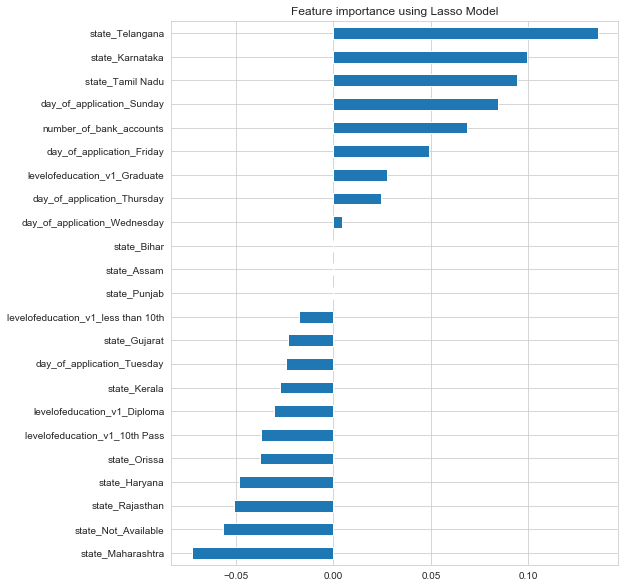

In [238]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Using sklearn feature selection module to get best features

In [259]:
def sklearn_feature_selection(model,distribution):
    max_score =0.0
    maxf = 0
    for i in range(5,42):
        X_new = SelectKBest(distribution, k=i).fit_transform(df.iloc[:,:-1], df['bad_var'])
        X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_new, df['bad_var'], test_size=0.1, random_state=42)
        if(model =='gbc'):
            gbc = GradientBoostingClassifier()
            gbc.fit(X_trainf, y_trainf)
            pred = gbc.predict(X_testf)
        if(model =='XGB'):
            gbc = xgb.XGBClassifier()
            gbc.fit(X_trainf, y_trainf)
            pred = gbc.predict(X_testf)
        if(model =='log'):
            regressor = LogisticRegression(random_state =1, solver='lbfgs', class_weight='balanced')
            regressor.fit(X_trainf, y_trainf)
            pred = regressor.predict(X_testf)
        score = metrics.accuracy_score(y_testf, pred)
        if(score>max_score):
            max_score = score
            maxf =i
    return max_score, maxf

In [260]:
max_score , maxf = sklearn_feature_selection('gbc',f_classif)
print("The max accuracy obtainted from feature selection using SelectBest is: ",max_score*100)

The max accuracy obtainted from feature selection using SelectBest is:  72.41379310344827
